In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"../data/train_data.csv")

In [2]:
data['bp_lo'].max()

120.0

In [29]:
data.head()

,id,age,gender,height,weight,bp_high,bp_lo,cholesterol,gluc,diabetic,smoke,alco,active,cardio
0,42910,61,2,160,65.0,110,81.0,2,1,1,1,0,1,1
1,17437,65,1,151,74.0,160,100.0,1,1,1,0,0,1,1
2,49231,50,1,168,60.0,130,80.0,1,1,1,0,0,1,1
3,6221,50,2,175,95.0,120,90.0,1,1,1,0,0,1,1
4,2934,54,1,164,59.0,110,70.0,1,1,1,0,0,0,0


In [30]:
print(data["bp_lo"].describe())
print(data["bp_lo"].isnull().sum())
print(data["bp_lo"].dtypes)

count    54913.000000
mean        81.302296
std          9.362770
min         50.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        120.000000
Name: bp_lo, dtype: float64
879
float64


In [31]:
m_bp_lo = data.loc[:, 'bp_lo'].mean()
m_round=round(m_bp_lo,-1)
print(m_round)

80.0


In [32]:
np.where(pd.isnull(data))

(array([    8,    36,    55,    92,    93,   282,   314,   421,   484,
          492,   597,   697,   791,   813,   905,   910,  1016,  1084,
         1157,  1191,  1205,  1324,  1357,  1403,  1414,  1461,  1553,
         1772,  1790,  1841,  1943,  2158,  2284,  2295,  2388,  2399,
         2426,  2433,  2450,  2487,  2501,  2504,  2515,  2536,  2645,
         2740,  2818,  2965,  2999,  3024,  3060,  3071,  3177,  3193,
         3241,  3308,  3374,  3400,  3506,  3540,  3544,  3620,  3668,
         3732,  3741,  3768,  3804,  3808,  3855,  3878,  3993,  4022,
         4026,  4108,  4186,  4229,  4431,  4906,  5044,  5123,  5239,
         5337,  5409,  5535,  5537,  5541,  5548,  5585,  5758,  5796,
         5903,  5962,  6119,  6129,  6215,  6259,  6325,  6362,  6406,
         6457,  6499,  6551,  6592,  6628,  6643,  6865,  6881,  6925,
         6945,  7002,  7037,  7094,  7230,  7241,  7282,  7296,  7405,
         7417,  7443,  7451,  7478,  7495,  7496,  7571,  7600,  7736,
      

In [42]:
data['bp_lo'].fillna(value=m_round, inplace=True)
print('Updated Dataframe:')
print(data)
print(data["bp_lo"].isnull().sum())

Updated Dataframe:
          id  age  gender  height  weight  bp_high     bp_lo  cholesterol  \
0      42910   61       2     160    65.0      110  0.442857            2   
1      17437   65       1     151    74.0      160  0.714286            1   
2      49231   50       1     168    60.0      130  0.428571            1   
3       6221   50       2     175    95.0      120  0.571429            1   
4       2934   54       1     164    59.0      110  0.285714            1   
...      ...  ...     ...     ...     ...      ...       ...          ...   
55787  53324   51       1     175    84.0      120  0.428571            3   
55788   8962   46       1     158    61.0      120  0.428571            1   
55789  78588   63       2     188   104.0      160  0.714286            3   
55790   1201   44       2     171    71.0      120  0.428571            1   
55791  22642   56       1     158    75.0      150  0.428571            2   

       gluc  diabetic  smoke  alco  active  cardio  
0  

In [34]:
data.to_csv("fill data bp_lo.csv")

In [55]:
print("Original DataFrame:")
print(data["bp_lo"])
print()

#  Min-Max Scaling
def min_max_scaling(df, column_name):
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    df[column_name] = (df[column_name] - min_value) / (max_value - min_value)

min_max_scaling(data,"bp_lo" )

print("DataFrame after Min-Max Scaling:")
print(data["bp_lo"])
print()

Original DataFrame:
0        0.442857
1        0.714286
2        0.428571
3        0.571429
4        0.285714
           ...   
55787    0.428571
55788    0.428571
55789    0.714286
55790    0.428571
55791    0.428571
Name: bp_lo, Length: 55792, dtype: float64

DataFrame after Min-Max Scaling:
0        0.442857
1        0.714286
2        0.428571
3        0.571429
4        0.285714
           ...   
55787    0.428571
55788    0.428571
55789    0.714286
55790    0.428571
55791    0.428571
Name: bp_lo, Length: 55792, dtype: float64



In [56]:
corr=data["bp_lo"]. corr(data["cardio"])
print(corr)

0.335531492031993


In [57]:
c=data["bp_lo"]. corr(data["bp_high"])
print(c)

0.6936512849033942


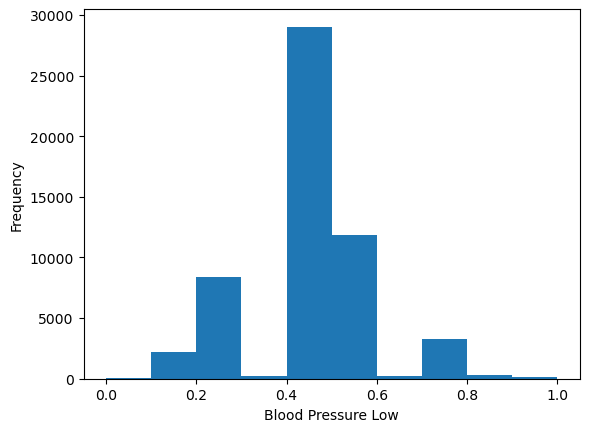

In [58]:
plt.hist(data["bp_lo"])
plt.xlabel('Blood Pressure Low')
plt.ylabel('Frequency')
plt.title('')
plt.show()

In [59]:
correlation_matrix = data[['bp_lo', 'bp_high', 'cardio']].corr()
correlation_matrix

,bp_lo,bp_high,cardio
bp_lo,1.000000,0.693651,0.335531
bp_high,0.693651,1.000000,0.427767
cardio,0.335531,0.427767,1.000000


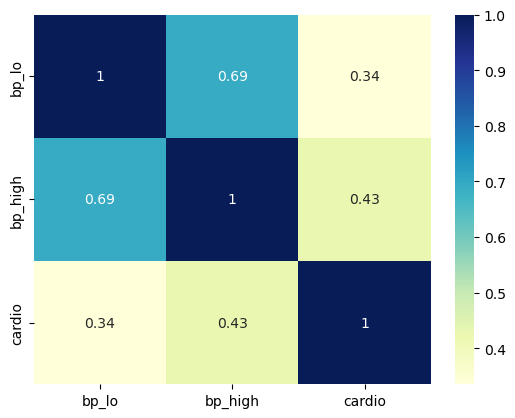

In [60]:
dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True) 
plt.show() 